# 2. Perform KNN from scratch and with the library and plot the results. Use random generated datapoints and make_blobs dataset of sklearn.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from statistics import mode
from sklearn import datasets

In [15]:
x,y=datasets.make_blobs(n_samples=500, n_features=2, random_state=42)


In [16]:
df=pd.DataFrame(x,columns=["Feature1","Feature2"])
data=df.copy()
data["Target"]=y
data.head()

,Feature1,Feature2,Target
0,-5.730354,-7.583286,2
1,1.942992,1.918875,1
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,5.841093,1.565094,1


In [17]:
def knn(point,data):
    distance=[]
    for i in data:
        sumn=0
        for j in range(len(data[0])):
            sumn+=(i[j]-point[j])**2
        distance.append(np.sqrt(sumn))
    return distance

dis=knn((0,0),x)
data1=data.copy()
data1["Distance"]=dis
data1.sort_values('Distance',inplace=True)
data1.head(10)


,Feature1,Feature2,Target,Distance
358,2.168234,1.176274,1,2.466751
1,1.942992,1.918875,1,2.730806
241,2.601754,0.965083,1,2.774980
138,2.515983,1.447415,1,2.902616
132,2.572437,1.884050,1,3.188585
394,2.769087,1.621656,1,3.208989
348,3.191794,0.565706,1,3.241539
322,3.045451,1.373795,1,3.340971
206,3.349918,0.678091,1,3.417859
430,3.456620,-0.066062,1,3.457252


In [18]:
k=9
a=data1["Target"][:k].values
print("Class : ",mode(a))

Class :  1


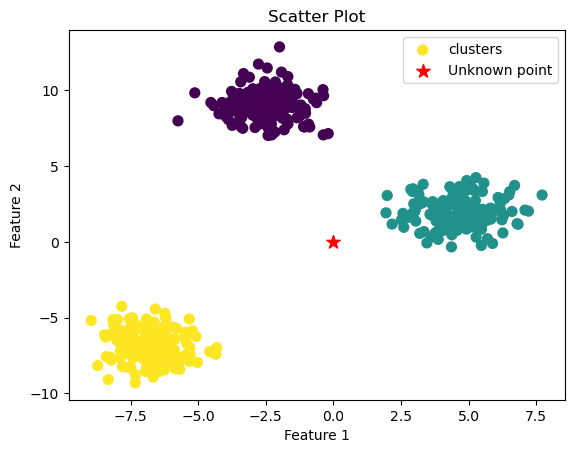

In [19]:
plt.title("Scatter Plot")
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis', s=50)
plt.scatter(0,0,marker="*",color="red",s=100,label="Unknown point")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(("clusters","Unknown point"))
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [21]:
error_rate=[]
for i in range(1,10):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    prediction=k.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))
    

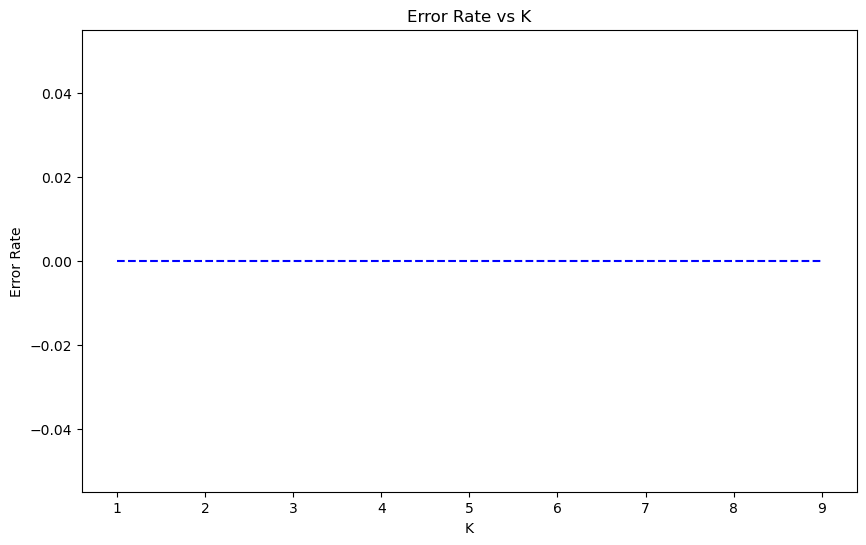

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed')
plt.title("Error Rate vs K")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [23]:
#knn by function 

In [24]:
k=KNeighborsClassifier(n_neighbors=3)
k.fit(X_train,y_train)
prediction=k.predict(X_test)

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        63

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



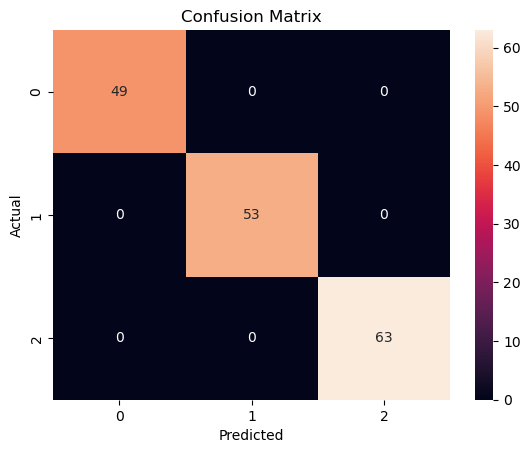

In [26]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
accuracy=accuracy_score(y_test,prediction)
print("accuracy : ",accuracy)

accuracy :  1.0
